# Cancer remission and tumor stability

In [1]:
%load_ext autoreload
import numpy as np
from agent_model_2 import *
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import seaborn as sns

%matplotlib inline

## Agent Model v2

* Equilateral triangle 2D lattice.
* Fixed position tumor cell and moving Natural Killers.
* Tumor cells has a 3 state life cycle plus a dead state.
* Rigid boundary conditions.
* Resource flux with fixed borders.
* Tumor growth as a function of available resources and space.

### Tumor cell

Tumor cells will follow a life cycle with 3 states as shown in the diagram below.

<img src="img/automata.png" style="max-width:500px">

* $S_0: $ correspond to the interphase, which includes states $G_1$, $S$ and $G_2$.
* $S_1: $ mitosis or M state, which usually last for 1/10 of $S_0$.
* $S_2: $ $G_0$ or resting state, induced for lack of resources or space to divide.
* $S_3: $ a cell that has gone through apoptosis (death).

In [3]:
N = 50
timesteps = 300

params = {
    "lattice_size": N,
    "difussion_coef": 0.9,
    "tumor_init_pos": N**2//2 + N//2,
    "tumorcell_consumption": 2,
    "tumorcell_mitosis_threshold": 8,
    "tumorcell_apoptosis_threshold": 20,
    "resources_init_min": 50,
    "resources_init_max": 100
}

hc = Tissue1(params)

for i in range(timesteps):
    hc.timestep()

In [4]:
interact(hc.plot_tissue, timestep=widgets.IntSlider(value=0, min=0, max=timesteps))

interactive(children=(IntSlider(value=0, description='timestep', max=300), Output()), _dom_classes=('widget-in…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

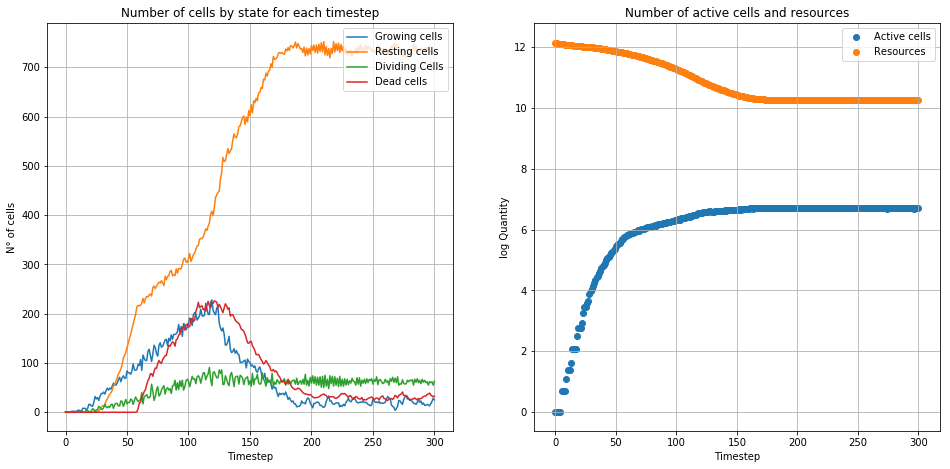

In [5]:
hc.plot_data()

### Resources deprivation scenario

In [ ]:
N = 50
timesteps = 300

params = {
    "lattice_size": N,
    "difussion_coef": 0.9,
    "tumor_init_pos": N**2//2 + N//2,
    "tumorcell_consumption": 2,
    "tumorcell_mitosis_threshold": 8,
    "tumorcell_apoptosis_threshold": 20,
    "resources_init_min": 20,
    "resources_init_max": 50
}

hc = Tissue1(params)

for i in range(timesteps):
    hc.timestep()

In [ ]:
interact(hc.plot_tissue, timestep=widgets.IntSlider(value=0, min=0, max=timesteps))

In [ ]:
hc.plot_data()

### Natural Killer (NK) cell

* Moves over the centroids of each triangle in the tumor 2D lattice.
* Has a predefined chance of detecting a tumor cell and kill it.
* Secretes cytokines to attract more NK cells.

# Simulación 1

In [ ]:
params = {
    "lattice_size": N,
    "tumorcell_phagocytosis_rate": 0.008,
    "resources_difussion_coef": 0.7,
    "tumor_init_pos": 1301,
    "tumorcell_consumption": 2,
    "tumorcell_mitosis_threshold": 12,
    "tumorcell_apoptosis_threshold": 15,
    "resources_init_min": 100,
    "resources_init_max": 200,
    "cytokines_init_min": 2,
    "cytokines_init_max": 2,
    "cytokines_difussion_coef": 0.3,
    "nk_init_count": 50,
    "nkcell_movement_speed": 1,
    "nkcell_detection_probability": 0.7,
    "nkcell_cytokines_release": 15,
    "nkcell_vanish_rate": 0.01,
    "nkcell_incoming_rate": 0.1,
    "cytokines_decay": 0.1
}

<video controls src="video1.mp4"/>

<img src="image1.png">

# Simulación 2

In [ ]:
params = {
    "lattice_size": N,
    "tumorcell_phagocytosis_rate": 0.008,
    "resources_difussion_coef": 0.7,
    "tumor_init_pos": 1301,
    "tumorcell_consumption": 2,
    "tumorcell_mitosis_threshold": 12,
    "tumorcell_apoptosis_threshold": 15,
    "resources_init_min": 80,
    "resources_init_max": 150,
    "cytokines_init_min": 2,
    "cytokines_init_max": 2,
    "cytokines_difussion_coef": 0.3,
    "nk_init_count": 50,
    "nkcell_movement_speed": 1,
    "nkcell_detection_probability": 0.7,
    "nkcell_cytokines_release": 15,
    "nkcell_vanish_rate": 0.01,
    "nkcell_incoming_rate": 0.25,
    "cytokines_decay": 0.1
}

<video controls src="video2.mp4"/>

<img src="image2.png">

In [2]:
N = 51 # MUST BE ODD
timesteps = 1000
np.random.seed(100)

params = {
    "lattice_size": N,
    "tumorcell_phagocytosis_rate": 0.008,
    "resources_difussion_coef": 0.7,
    "tumor_init_pos": 1301,
    "tumorcell_consumption": 2,
    "tumorcell_mitosis_threshold": 12,
    "tumorcell_apoptosis_threshold": 15,
    "resources_init_min": 80,
    "resources_init_max": 150,
    "cytokines_init_min": 2,
    "cytokines_init_max": 2,
    "cytokines_difussion_coef": 0.3,
    "nk_init_count": 50,
    "nkcell_movement_speed": 1,
    "nkcell_detection_probability": 0.7,
    "nkcell_cytokines_release": 15,
    "nkcell_vanish_rate": 0.01,
    "nkcell_incoming_rate": 0.25,
    "cytokines_decay": 0.1
}

t2 = Tissue2(params)

for i in range(timesteps):
    t2.timestep()

for k in range(0,1000):
    t2.plot_tissue(k)

In [5]:
interact(t2.plot_tissue, timestep=widgets.IntSlider(value=0, min=0, max=timesteps))

interactive(children=(IntSlider(value=0, description='timestep', max=1000), Output()), _dom_classes=('widget-i…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

import cv2
import os
image_folder = 'img'
video_name = 'video2.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
images_2 = sorted(images,key=lambda x: int(os.path.splitext(x)[0]))
#print(images_2)
frame = cv2.imread(os.path.join(image_folder, images_2[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, -1, 1, (width,height))

for image in images_2:
    #print(image)
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

/Users/pabloibarra/Desktop/cc4/agent_model_2.py:471: RuntimeWarning: divide by zero encountered in log
  ax[1].scatter(np.arange(0, len(self.tumor)), np.log(np.sum(np.array(sums)[:,0:3], axis=1)), label="Active cells")


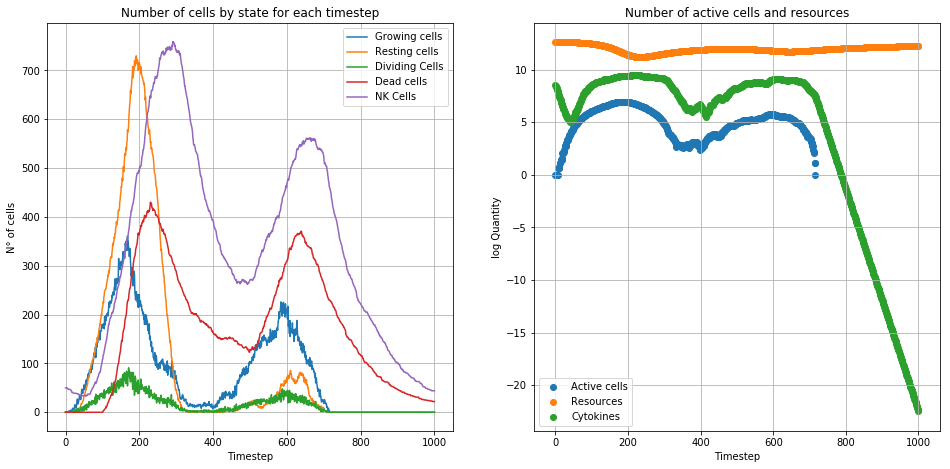

In [3]:
data = t2.plot_data()

# Modelo de densidad


$NK$ = Natural killers

$Tm$ = Tumors Cells

$Ct$ = Cytokines

$R$ = Resources

$Tm^{t+1} = Tm^{t} · (1+mitosis\_grow\_rate(Tm^{t})) - apoptosis\_rate(resources)·Tm^{t} - f\_i(Tm^{t},NK^{t})·Tm^{t}·NK^{t}·nkcell\_detection\_rate$

$R^{t+1} = R^{t} - Tm^{t}·Consumption + \frac{\alpha}{4}(R^{t}_{a} + R^{t}_{b} + R^{t}_{c} + R^{t}_{d})$

$NK^{t+1} = NK^{t} - NK^{t}·Vanish\_rate + Ct^{t}·NK^{t}·incoming\_rate$

$Ct^{t+1} = Ct^{t} - Ct^{t}·cytokines\_decay + Ct^{t}·nkcell\_cytokines\_release·nkcell\_detection\_rate·f\_i(Tm^{t},NK^{t})$

In [69]:
l = []
g = []
f = []
for k in t2.tumor:
    t = 0
    z = 0
    vv = 0
    for tumor_cell in k[k != None]:
        if tumor_cell.state == 3:
            t+=1
        if tumor_cell.state == 2:
            z+=1
        if tumor_cell.state != 3:
            vv+=1
    l.append(t)
    g.append(vv)
    f.append(z)

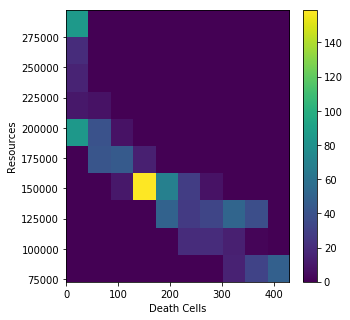

In [70]:
fig, ax = plt.subplots(figsize=(5,5))
h = ax.hist2d(l,np.sum(np.array(t2.resources),axis=1))
ax.set_ylabel("Resources")
ax.set_xlabel("Death Cells")
plt.colorbar(h[3], ax=ax)

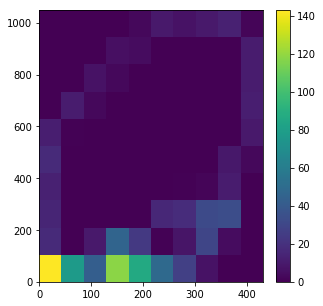

In [71]:
fig, ax = plt.subplots(figsize=(5,5))
h = ax.hist2d(l,g)
plt.colorbar(h[3], ax=ax)